# Missing Values

In [1]:
pip install matplotlib scipy seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanicDF = pd.read_csv('data/Titanic/train.csv')

In [4]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Missing values in dataset

In [5]:
titanicDF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Missing completely at random (MCAR) 

In [6]:
titanicDF[titanicDF['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### ---> Posiblely Embared data is missing completely at random as there is no sign of dependency 

## Missing data not at random
### Checking percentage of missing value in cabin against survived column, as there might be interdependecy w.r.t. missing values in cabin column

In [7]:
titanicDF['Cabin_null'] =np.where( titanicDF['Cabin'].isnull(),1,0)
titanicDF.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### ---> Cabin data has higher missing values where passenger didn't survive

# Techniques to handle Missing value 
### 1. Mean/Median/Mode
### 2. Random Sample Imputation
### 3. Capturing NaN values with new features
### 4. End of distribution imputation
### 5. Arbitrary Imputation 
### 6. Frequent categories imputation

### 1. Mean/Median/Mode
When - data missing completely at random (MCAR)

In [8]:
def impute_nan_mean_median_mode(df, column, value):
    df[column + '_NonNull'] = df[column].fillna(value)

In [9]:
impute_nan_mean_median_mode(titanicDF, 'Age', titanicDF['Age'].median())
titanicDF.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Cabin_null     0.000000
Age_NonNull    0.000000
dtype: float64

In [10]:
print(titanicDF['Age'].std())
print(titanicDF['Age_NonNull'].std())

14.526497332334042
13.019696550973201


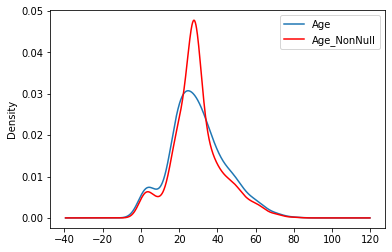

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
titanicDF['Age'].plot(kind='kde', ax=ax)
titanicDF['Age_NonNull'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


### 2. Random Sample Imputation

In [12]:
titanicDF = pd.read_csv("data/Titanic/train.csv", usecols=['Age', 'Fare', 'Survived'])


In [13]:
titanicDF.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_with_random_sample(df, column):
    df[column + '_random'] = df[column]
    random_samples = df[column].dropna().sample(df[column].isnull().sum(), random_state=0)  # randome_state = 0 means random values will not change
    random_samples.index=df[df['Age'].isnull()].index
    df.loc[df[column].isnull(), column+ "_random"] = random_samples


In [15]:
impute_with_random_sample(titanicDF,'Age')
titanicDF.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


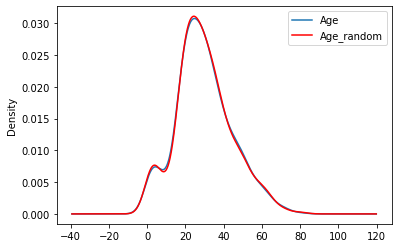

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
titanicDF['Age'].plot(kind='kde', ax=ax)
titanicDF['Age_random'].plot(kind='kde',ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 3. Capturing NaN values with new features

In [17]:
titanicDF = pd.read_csv('data/Titanic/train.csv',usecols=['Age', 'Survived'])

In [18]:
def impute_with_newfeature(df, column):
    df[column + '_NonNull'] = np.where(df[column].isnull(), 1, 0)

In [19]:
impute_with_newfeature(titanicDF, 'Age')
titanicDF['Age'].fillna(titanicDF['Age'].mean(), inplace=True)
titanicDF.head()

,Survived,Age,Age_NonNull
0,0,22.0,0
1,1,38.0,0
2,1,26.0,0
3,1,35.0,0
4,0,35.0,0


### 4. End of distribution imputation

<AxesSubplot:>

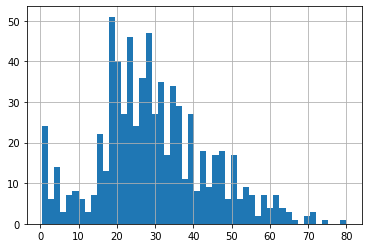

In [20]:
titanicDF = pd.read_csv('data/Titanic/train.csv', usecols=['Age', 'Fare', 'Survived'])
titanicDF.Age.hist(bins=50)

In [21]:
titanicDF.Age.std()*3 

43.57949199700212

<AxesSubplot:ylabel='Density'>

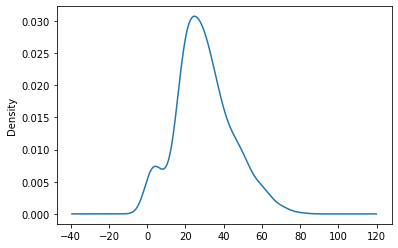

In [22]:
titanicDF.Age.plot.kde()

/Users/apple/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

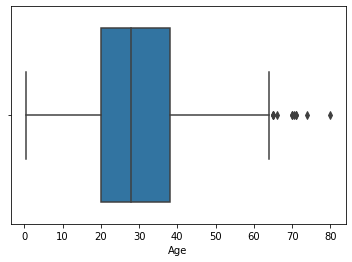

In [23]:
sns.boxplot('Age', data=titanicDF)

In [24]:
def impute_with_end_distribution(df, column):
    df[column + '_end_distribution'] = df[column].fillna(df[column].mean() + 3*df[column].std())

In [25]:
impute_with_end_distribution(titanicDF,'Age')

/Users/apple/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

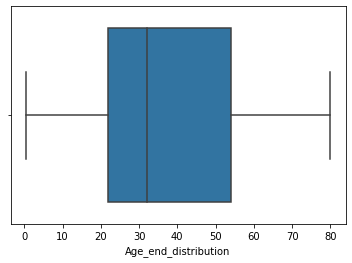

In [26]:
sns.boxplot('Age_end_distribution', data=titanicDF) # outliers are gone

<AxesSubplot:>

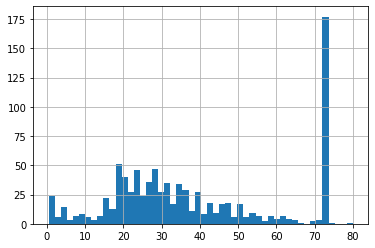

In [27]:
titanicDF['Age_end_distribution'].hist(bins=50) # resultant rigth skewed data

### 5. Arbitrary Imputation 

In [28]:
titanicDF = pd.read_csv("data/Titanic/train.csv", usecols = ["Age","Fare","Survived"])

<AxesSubplot:>

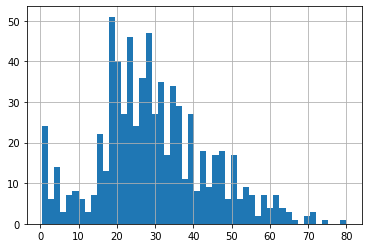

In [29]:
titanicDF.Age.hist(bins=50)

In [30]:
def impute_with_arbitary(df, column, value):
    df[column + "_arbitary"] = df[column].fillna(value)

In [31]:
impute_with_arbitary(titanicDF, 'Age', 100)

<AxesSubplot:>

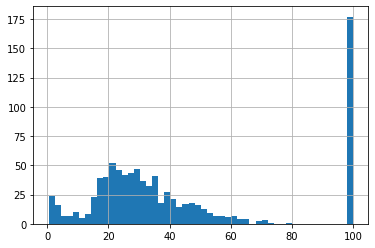

In [32]:
titanicDF.Age_arbitary.hist(bins=50)

### 6. Frequent categories imputation

In [33]:
houseDF = pd.read_csv("data/House Prices/train.csv", usecols=['BsmtQual','FireplaceQu', 'GarageType','SalePrice'])

In [34]:
houseDF.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:xlabel='BsmtQual'>

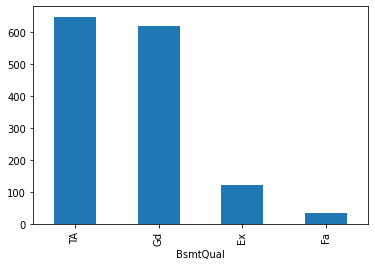

In [35]:
houseDF.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

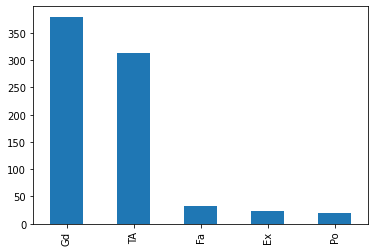

In [36]:
houseDF.FireplaceQu.value_counts().plot.bar()

<AxesSubplot:>

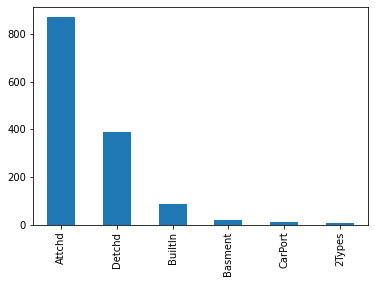

In [37]:
houseDF.GarageType.value_counts().plot.bar()

In [38]:
def impute_with_most_frequent_category(df, column):
    most_freq_cat = df[column].value_counts().index[0]
    df[column].fillna(most_freq_cat, inplace=True)
    # OR df[column].fillna(df[column].mode(), inplace=True)

In [39]:
impute_with_most_frequent_category(houseDF, 'BsmtQual')
houseDF.isnull().mean().sort_values(ascending=True)

BsmtQual       0.000000
SalePrice      0.000000
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Ordinal Number encoding

In [40]:
import datetime
date_list = [datetime.datetime.today() - datetime.timedelta(x) for x in range(0,15)]
dateDF = pd.DataFrame(date_list)
dateDF.columns=['Days']
dict_Week = {"Monday": 1, "Tuesday": 2, "Wednesday":3, "Thursday": 4, "Friday":5,"Saturday": 6, "Sunday":7}
dateDF['Week Day'] = dateDF["Days"].dt.day_name()

In [41]:
dateDF['Week Day']= dateDF['Week Day'].map(dict_Week)
dateDF

,Days,Week Day
0,2021-05-25 23:17:36.031384,2
1,2021-05-24 23:17:36.031395,1
2,2021-05-23 23:17:36.031398,7
3,2021-05-22 23:17:36.031400,6
4,2021-05-21 23:17:36.031403,5
5,2021-05-20 23:17:36.031405,4
6,2021-05-19 23:17:36.031407,3
7,2021-05-18 23:17:36.031409,2
8,2021-05-17 23:17:36.031411,1
9,2021-05-16 23:17:36.031413,7


### Categorical values by frequency count imputaion

In [46]:
adultDF=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, index_col=None)

In [47]:
adultDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
columns = [1,3,5,6,7,8,9,13]

In [49]:
adultDF = adultDF[columns]

In [51]:
adultDF.columns = ['Employement', 'Degree', 'Status', 'Designation', 'Family_job', 'Race', 'Sex', 'Country']

In [56]:
for column in adultDF.columns[:]:
    print(column, ": " , len(adultDF[column].unique()), 'labels')

Employement :  9 labels
Degree :  16 labels
Status :  7 labels
Designation :  15 labels
Family_job :  6 labels
Race :  5 labels
Sex :  2 labels
Country :  42 labels


In [62]:
country_dict = adultDF['Country'].value_counts().to_dict()
adultDF['Country'] = adultDF['Country'].map(country_dict)
adultDF.head()

<ipython-input-62-a5279c54ff41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultDF['Country'] = adultDF['Country'].map(country_dict)


,Employement,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


### Target guided ordinal encoding

In [64]:
titanicDF = pd.read_csv('data/Titanic/train.csv', usecols=['Cabin', 'Survived'])

In [70]:
titanicDF['Cabin'].fillna('Missing', inplace=True)
titanicDF['Cabin'].unique()
# Stripping category for simplecity
titanicDF['Cabin'] = titanicDF['Cabin'].astype(str).str[0]